|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) + [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html) +  [WIRED Global Center](https://resilience.utah.edu/) <br> created by [Valerio Pascucci](http://cedmav.org/)   |![nsdf](https://www.sci.utah.edu/~pascucci/public/NSDF-smaller.PNG)  |![NASA](https://upload.wikimedia.org/wikipedia/commons/e/e5/NASA_logo.svg)| ![wired](https://www.sci.utah.edu/~pascucci/public/wired-logo-small.png) |
|:---|:---:|:---:|---:|

## Uncomment the line below if any library is missing

In [1]:
#!pip install --upgrade openvisuspy xarray openvisuspy  matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys

# sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
import OpenVisus as ov
os.environ["VISUS_CACHE"]=os.environ.get("VISUS_CACHE","./visus_cache_can_be_erased")
print("VISUS_CACHE is ",os.environ["VISUS_CACHE"])

VISUS_CACHE is  c:/tmp/visus-cache


# More complex examples

tas_day_ACCESS-CM2_ssp585_r1i1p1f1_gn


  0%|          | 0/6 [00:00<?, ?it/s]

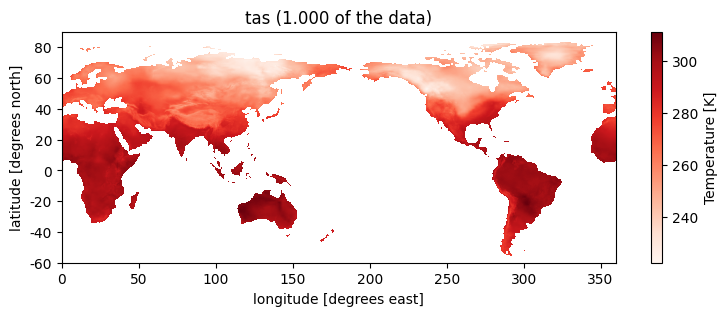

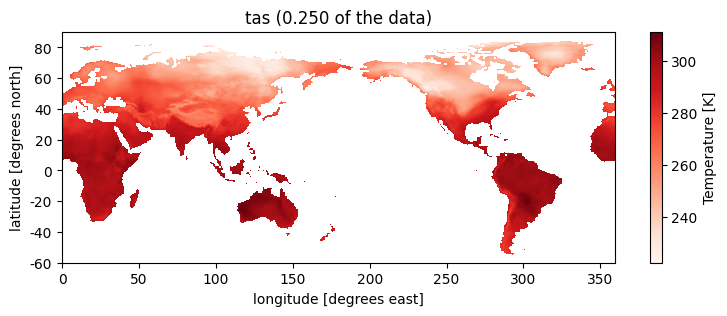

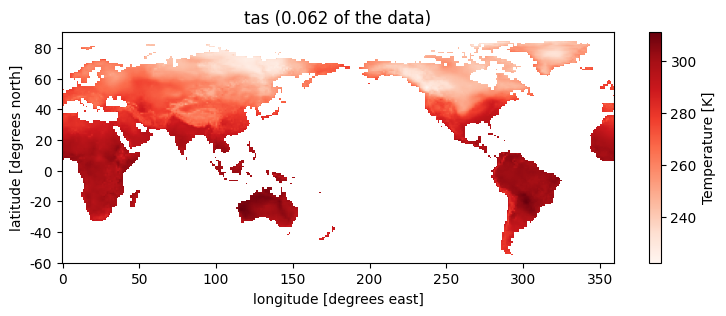

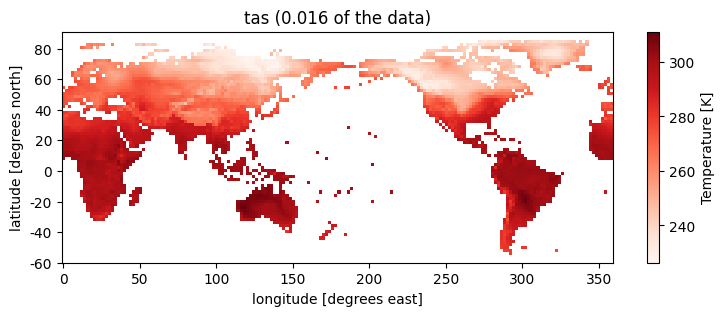

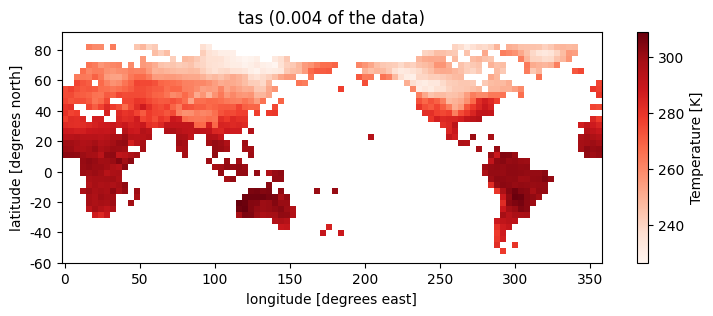

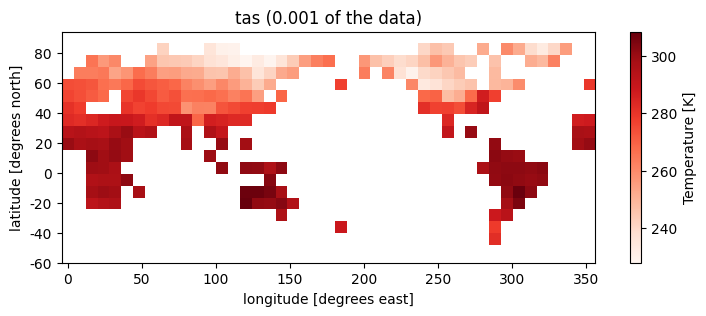

In [2]:
from tqdm.notebook import tqdm

variables = {
    "hurs":    "Near-Surface Relative Humidity",
    "huss":    "Near-Surface Specific Humidity",
    "pr":      "Precipitation",
    "rlds" :   "Surface Downwelling Longwave Radiation",
    "rsds":    "Surface Downwelling Shortwave Radiation",
    "sfcWind": "Daily-Mean Near-Surface Wind Speed",
    "tas":     "Daily Near-Surface Air Temperature",
    "tasmax":  "Daily Maximum Near-Surface Air Temperature",
    "tasmin":  "Daily Minimum Near-Surface Air Temperature"
}
model = "ACCESS-CM2"
year=2015 # This is the year whne the data switches from historical to simulated
scenario = "historical" if year < 2015 else "ssp585"
my_cmap = 'Reds'
variable = "tas"

# Open (connect to) dataset
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"
print(dataset_name)
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")
data=db.read()
y_max,x_max = data.shape 

xlabels = [str(x) for x in range(  0,360,50)] 
ylabels = [str(x) for x in range(-60, 90,20)] 

for quality in tqdm([0,-2,-4,-6,-8,-10]): # use negative even numbers for resolution 
    my_fig, my_plt = plt.subplots(figsize=(9, 3))
    data=db.read(time=year*365+364,quality=quality)
    y,x = data.shape 
    xticks = [i*x/x_max for i in range(0,x_max, 200)] 
    yticks = [i*y/y_max  for i in range(y_max,0,-80)] 

    plot = my_plt.imshow(np.flip(data, 0), cmap=my_cmap)
    my_plt.set_xticks(xticks, labels=xlabels)
    my_plt.set_yticks(yticks, labels=ylabels)
    my_plt.set(xlabel='longitude [degrees east]', ylabel='latitude [degrees north]',
               title=f"{variable} ({1.0/(2**(-1*quality)):.03f} of the data)")

    # add a colorbar to our figure, based on the plot we just made above
    my_fig.colorbar(plot,location='right', label='Temperature [K]')
    plt.show()